# Laboration - Covid-19



## Setup

In [5]:
import pandas as pd

import plotly
import plotly_express as px
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

import re

import plot_tools as jplt

# Standard labels (re-used everywhere :) )
stdlabels = {"index":"Datum", "value":"Antal", "variable":""}



In [2]:
# Load Swedish C19 data
c19sweden = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Veckodata Riket"
)

# Uppgift 1

## 1a) Överblick över data

- veckonummerkolumnen nollställs vid årsskifte

- 13 kolumner och 89 rader, mestadels int, men två har floats

- Kolumnnamn:

['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv']

In [3]:
c19sweden.iloc[45:55]
c19sweden.tail()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976
88,2021,41,4062,39,79,1162506,11200,10,7886,18,1.7,14944,1439.800049


In [4]:
c19sweden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [5]:
c19sweden.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

## 1b) Slå ihop år och veckonummer

Så att det står ÅR v VECKONUMMER: "2020v12"

In [6]:
c19sweden["Vecka"] = c19sweden["år"].astype(str) + "v" + c19sweden["veckonummer"].astype(str)

# Check
c19sweden["Vecka"]

0      2020v6
1      2020v7
2      2020v8
3      2020v9
4     2020v10
       ...   
84    2021v37
85    2021v38
86    2021v39
87    2021v40
88    2021v41
Name: Vecka, Length: 89, dtype: object

## 1c-f) Rita diagram

In [7]:
# Rename columns to easily get nice plot labels

# backup copy of the original data set
c19swedenold = c19sweden.copy

# New column names
labels = [
    'År', 
    'Veckonummer', 
    'Antal fall per vecka', 
    'Antal fall per 100000inv och vecka',
    'Antal fall per 100000inv och 14 dagar', 
    'Kum. antal fall per vecka', 
    'Kum. antal fall per 100000inv och vecka',
    'Antal nya intensivvårdade per vecka', 
    'Kum. antal intensivvårdade per vecka',
    'Antal avlidna per vecka', 
    'Antal avlidna per miljon inv. och vecka',
    'Kum. antal avlidna per vecka', 
    'Kum. antal avlidna per miljon inv. och vecka'
]

c19sweden = c19sweden.rename({
    oldcolumn:label for (oldcolumn,label) in zip(c19sweden.columns,labels)
}, axis="columns")

# Print to check (and for later reference)
for column in c19sweden.columns:
    print(column)


År
Veckonummer
Antal fall per vecka
Antal fall per 100000inv och vecka
Antal fall per 100000inv och 14 dagar
Kum. antal fall per vecka
Kum. antal fall per 100000inv och vecka
Antal nya intensivvårdade per vecka
Kum. antal intensivvårdade per vecka
Antal avlidna per vecka
Antal avlidna per miljon inv. och vecka
Kum. antal avlidna per vecka
Kum. antal avlidna per miljon inv. och vecka
Vecka


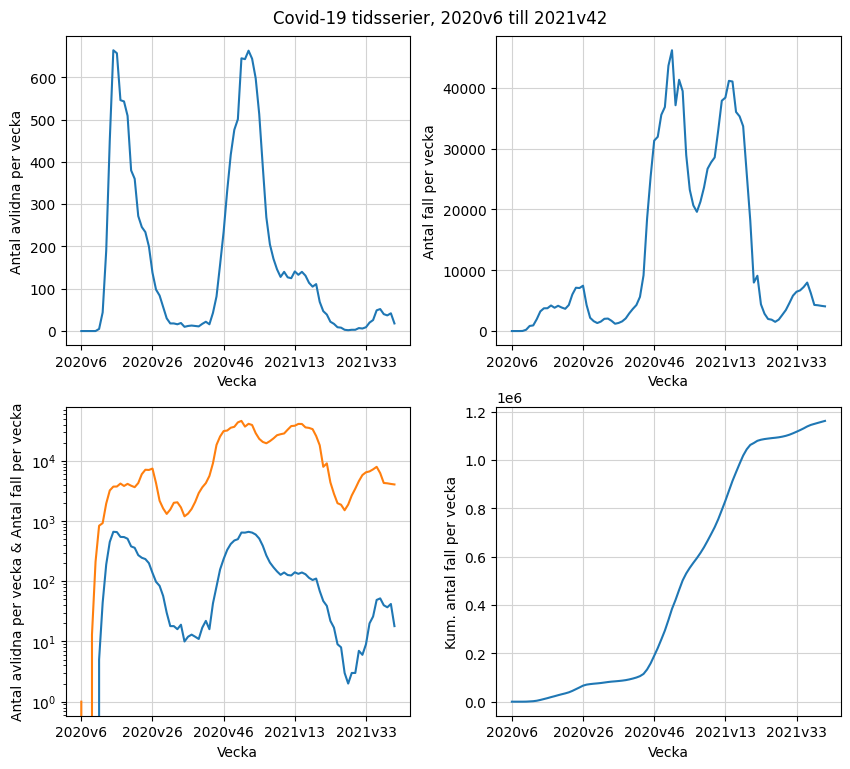

In [9]:
# With seaborn

# Set up of subplots and other settings
fig,ax = plt.subplots(
    2,2, 
    dpi=100,
    figsize=(10,9)
)
fig.suptitle("Covid-19 tidsserier, 2020v6 till 2021v42",y=0.91)
fig.set_facecolor("white")

# Lists with plot parameters and plot labels
xlabel = "Vecka"
ylabels = [
    "Antal avlidna per vecka",
    "Antal fall per vecka",
   ["Antal avlidna per vecka","Antal fall per vecka"],
    "Kum. antal fall per vecka"
]

# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now

for n in range(ax.size):
    subp_coord = (n//2,(n-2)%2) # Gives 0,0 ; 0,1 ; 1,0 ; and 1,1

    if len(ylabels[n]) == 2:
        ylabel = ylabels[n][0]+" & "+ylabels[n][1]
        jplt.sns_line(c19sweden, xlabel, ylabels[n][0], xlabel, ylabel, ax[subp_coord])
        jplt.sns_line(c19sweden, xlabel, ylabels[n][1], xlabel, ylabel, ax[subp_coord])
        ax[subp_coord].set_yscale("log")
    else:
        jplt.sns_line(c19sweden, xlabel, ylabels[n], xlabel, ylabels[n], ax[subp_coord])

plt.subplots_adjust(wspace = 0.25)

# save figure: 1cdef_seaborn.png
fig.savefig("visualiseringar/1cdef_seaborn.png")


In [10]:
# With plotly express

# So this will plots
# 1c avlidna fall per vecka, 2020v6 to now
# 1d nya fall per vecka, 2020v6 to now.
# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now
# 1f kumulativt antal fall, 2020v6 to now

# List of file names
filenames = [
    "1c_avlidnavecka",
    "1d_fallvecka",
    "1e_avlidnafall",
    "1f_kumfall"
]

for ylabel,file in zip(ylabels,filenames):
    # The double plot window should be logscaled
    if len(ylabel) == 2:
        linlog = True
    else:
        linlog = False

    # Plot, default labels are modified to standard labels
    fig = px.line(
        c19sweden, x=xlabel, y=ylabel, log_y=linlog,
        labels={"value":"Antal människor", "variable":""}
    )
    fig.show()
    
    # Save figures as html files
    plotly.offline.plot(fig, filename=f"visualiseringar/{file}_plotlyx.html")


# Uppgift 2 - uppvärmning vaccindata

I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.

In [11]:
# Load Swedish C19-vaccination data
c19se_vaccine = pd.read_excel(
    "Folkhalsomyndigheten_Covid19_Vaccine.xlsx",
    sheet_name="Vaccinerade kommun och ålder"
)

# List columns
print(c19se_vaccine.columns)


Index(['Län', 'Län_namn', 'Kommun', 'Kommun_namn', 'Ålder', 'Befolkning',
       'Antal minst 1 dos', 'Antal färdigvaccinerade', 'Andel minst 1 dos',
       'Andel färdigvaccinerade'],
      dtype='object')


## Uppgifter 2a) till 2d)

In [12]:
# a) Hur många län finns representerade i datasetet?
Nlaen = len(c19se_vaccine['Län_namn'].unique())
print(f"a) Number of Läns represented in data set: {Nlaen}")

# b) Hur många kommuner finns representerade i datasetet?
print(f"b) Number of Kommuns represented in data set: {len(c19se_vaccine['Kommun_namn'].unique())}")

# c) Hur stor är befolkningen som är representerad i datasetet?
print(f"c) Number of Swedes represented in data set {c19se_vaccine['Befolkning'].sum()} (16yrs and older)")

# d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor
#    totala befolkningen är i Sverige.
# From https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/
# Number of inhabitants in Sweden in 2020-12-31 was
Nswedes = 10379295
print(f"d) Number of Swedes aged younger than 16yrs: {Nswedes - c19se_vaccine['Befolkning'].sum()}")


a) Number of Läns represented in data set: 21
b) Number of Kommuns represented in data set: 290
c) Number of Swedes represented in data set 8541497 (16yrs and older)
d) Number of Swedes aged younger than 16yrs: 1837798


## 2e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

In [13]:
# Create a new dataframe with columns
# 'Befolkning', 'Antal minst 1 dos', 'Antal 2 doser', 'Andel minst 1 dos','Andel 2 doser'
# per Län instead of per kommun

# Use groupby, take the sum, remove "andel"-columns
# Reset index to Län_namn
vaccine_per_laen = c19se_vaccine.groupby(
    "Län").sum().drop(
    ["Kommun", "Andel minst 1 dos", "Andel färdigvaccinerade"], axis="columns"
    ).set_index(c19se_vaccine['Län_namn'].unique())

# Add andelar, normalise to population of Län
vaccine_per_laen["Andel minst 1 dos"] = vaccine_per_laen["Antal minst 1 dos"] / vaccine_per_laen["Befolkning"]
vaccine_per_laen["Andel 2 doser"] = vaccine_per_laen["Antal färdigvaccinerade"] / vaccine_per_laen["Befolkning"]

# Rename "färdigvaccinerade" to "antal 2 doser"
vaccine_per_laen = vaccine_per_laen.rename({"Antal färdigvaccinerade":"Antal 2 doser"}, axis="columns")

# Check 
vaccine_per_laen.head()


,Befolkning,Antal minst 1 dos,Antal 2 doser,Andel minst 1 dos,Andel 2 doser
Stockholm,1951266,1584895,1459095,0.812239,0.747768
Uppsala,319391,284138,271144,0.889624,0.848941
Södermanland,244962,209702,198260,0.856059,0.809350
Östergötland,385978,336692,322632,0.872309,0.835882
Jönköping,298157,252915,238710,0.848261,0.800618


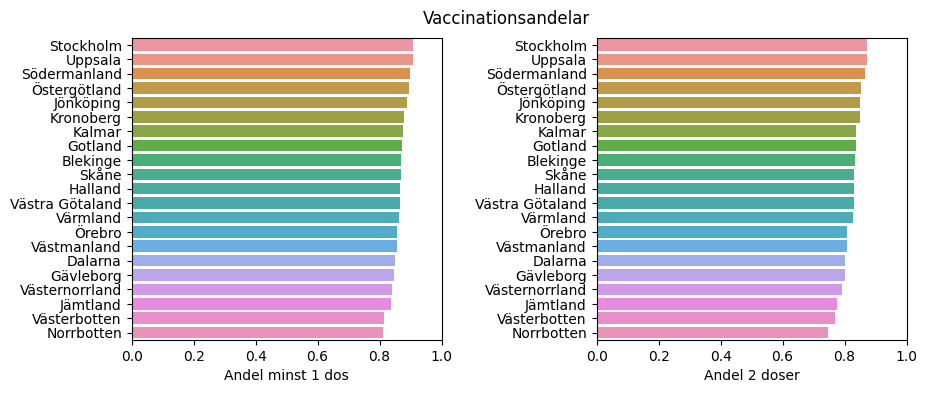

In [14]:
# Plot with Seaborn
fig,ax = plt.subplots(1,2, figsize=(10,4), dpi=100)
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
plt.subplots_adjust(wspace = 0.5)

sns.barplot(
    data=vaccine_per_laen.sort_values('Andel minst 1 dos', ascending=False), 
    x='Andel minst 1 dos', y=vaccine_per_laen.index,
    ax=ax[0]
);

plt.ylabel("")

sns.barplot(
    data=vaccine_per_laen.sort_values('Andel 2 doser', ascending=False), 
    x='Andel 2 doser', y=vaccine_per_laen.index,
    ax=ax[1]
);

plt.ylabel("")

# save figure: 2e_seaborn.png
# bbox_inches automatically searches for the limits around the figure so that
# nothing is cut.
fig.suptitle("Vaccinationsandelar",y=0.95)
fig.set_facecolor("white")
fig.savefig("visualiseringar/2e_vaccinandelar_seaborn.png", bbox_inches="tight")


In [15]:
# Plot with plotly express
fig = px.bar(
    vaccine_per_laen.sort_values('Andel 2 doser'), 
    x=vaccine_per_laen.index, y=['Andel minst 1 dos','Andel 2 doser'],
    labels={"x":"", "value":"Andel doser per län", "variable":""}
)
fig.update_layout(barmode='group', xaxis_tickangle=-45, yaxis_range=[0,1])
fig.show()

# Save figure as html file
plotly.offline.plot(fig, filename=f"visualiseringar/2e_vaccinandelar_plotlyx.html");


## 2f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal färdigvaccinerade.

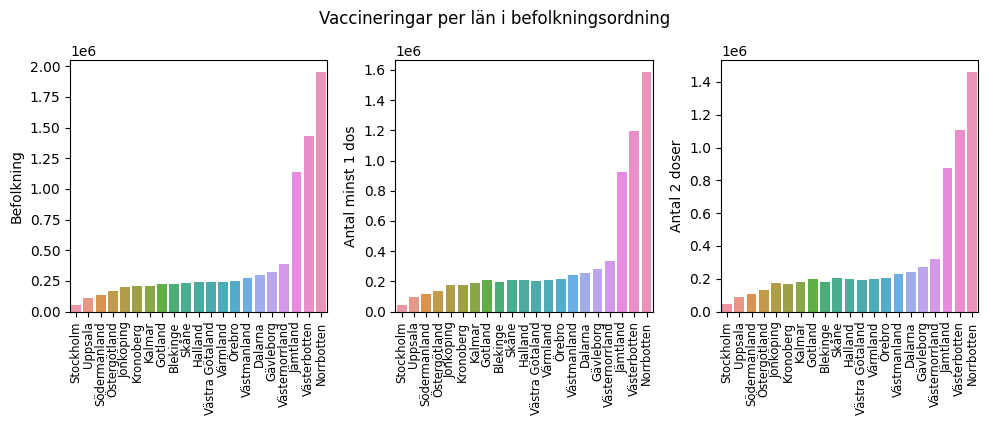

In [16]:
# Plot with Seaborn
fig,ax = plt.subplots(1,3, figsize=(10,4), dpi=100)
xmax = vaccine_per_laen['Befolkning'].max()+1e4
plt.subplots_adjust(wspace = 0.5)

# List of parameters to plot
plotparams = ['Befolkning','Antal minst 1 dos','Antal 2 doser']

for n in range(3):
    ax[n].set_xlim(0,xmax)
    sns.barplot(
        data=vaccine_per_laen.sort_values('Befolkning'), 
        x=vaccine_per_laen.index, y=plotparams[n],
        ax=ax[n]
    );
    ax[n].tick_params(axis='x', rotation=90, labelsize="small")
    ax[n].set_xlabel("")
fig.tight_layout()
fig.suptitle("Vaccineringar per län i befolkningsordning", y=1.05)

# Save figure
# bbox_inches automatically searches for the limits around the figure so that
# nothing is cut.
fig.set_facecolor("white")
fig.savefig("visualiseringar/2f_antalvaccin_seaborn.png", bbox_inches="tight")


In [17]:
# With plotly express
# befolkning > 16 år
# antal 1 dost
# antal 2 doser

fig = px.bar(
    vaccine_per_laen.sort_values('Befolkning', ascending=False),
    x=vaccine_per_laen.index, y=plotparams, 
    title="Vaccinationsantal per län i befolkningsordning",
    labels={"x":"", "value":"Antal vaccindoser per län", "variable":""}
)
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Save figure as html file
plotly.offline.plot(fig, filename=f"visualiseringar/2f_antalvaccin_plotlyx.html");


# Uppgift 3 - KPIer & explorativ dataanalys

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera sheets på båda Excel-filerna. Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla visualiseringar.

Vi har redan använt

- Antal avlidna, antal fall per vecka, kum. antal fall per vecka

- Antal vaccinerade och andel vaccinerade.

Jag tittar på

- Tidsserier av antal IVA och antal döda, samt gör ett förhållande däremellan.

- Tidsserier av antal IVA och avlidna mot antal vaccin (vaccin är per vecka, IVA och avlidna är per dag. Gör om alla till per vecka)

- Åldersgrupperingar: antal sjuka per åldersgrupp, antal IVA per åldersgrupper, antal döda per åldersgrupp och vaccinerade per ålder.


## 3.1 Antal IVA vs antal avlidna & förhållande däremellan

Första index jag undersöker här är hur antal döda och antal IVA-patienter förhåller sig mot varandra. Jag vill se om det finns någon förändring i överlevnadsgrad hos de allra mest sjuka patienterna. Hypotesen är att iom. att sjukdom har funnits ett tag har sjukvården blivit bättre på att ta hand om dem och att andelen döda jämfört med IVA borde sjunka.

Originaldatan är dagliga värden och relativt brusiga. Eftersom jag planerar att jämföra med vaccintal i ett senare avsnitt som är veckoliga data, plus eftersom de är brusiga tar jag veckoliga summor av dessa data (alltså antal döda per vecka).


In [17]:
# "Antal IVA per dag" and "Antal avlidna per dag"
# What is the ratio between IVA and dead, and how dows it evolve over time?

# I need:
# Folkhalsomyndigheten_Covid19.xlsx
# sheet: Antal avlidna per dag
# sheet: Antal intensivvårdade per dag

c19death = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Antal avlidna per dag", 
    index_col="Datum_avliden"
).rename_axis(index=None).drop("Uppgift saknas", axis="rows")

c19iva = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Antal intensivvårdade per dag", 
    index_col="Datum_vårdstart"
).rename_axis(index=None)

# Combine to one dataframe, change all NaN to 0
# and rename columns to nice styles
c19ivadeath = pd.concat([c19iva, c19death], axis="columns").fillna(0).rename({
    "Antal_intensivvårdade":"Antal IVA-patienter",
    "Antal_avlidna":"Antal avlidna"
}, axis="columns")

# Take weekly totals (need datetime for this, check setup before prob1)
# I do this since (i) the daily data are quote noisy and (ii) since I will compare with
# weekly data later.
days = 7
Nweeks = int(c19ivadeath.index.size / days)
c19ivadeath_week = {}

for n in range(Nweeks):

    # Extract times
    starttime = c19ivadeath.index[n*days].date()
    year = c19ivadeath.index[n*days].year
    week = c19ivadeath.index[n*days].week

    # Add to dictionary
    c19ivadeath_week[f"{year} v.{week}"] = \
        c19ivadeath.loc[starttime:starttime + relativedelta(days=days)].sum()

# Save to new dataframe
c19ivadeath_week = pd.DataFrame(c19ivadeath_week).transpose()

# Add ratio column
c19ivadeath_week["Förhållande avlidna mot IVA"] = \
    c19ivadeath_week["Antal avlidna"]/c19ivadeath_week["Antal IVA-patienter"]

# Check
print(c19ivadeath_week.head())
print("")
print(c19ivadeath.head())


           Antal IVA-patienter  Antal avlidna  Förhållande avlidna mot IVA
2020 v.10                  8.0            2.0                     0.250000
2020 v.11                 61.0           29.0                     0.475410
2020 v.12                226.0          145.0                     0.641593
2020 v.13                295.0          401.0                     1.359322
2020 v.14                327.0          700.0                     2.140673

            Antal IVA-patienter  Antal avlidna
2020-03-06                    1            0.0
2020-03-07                    1            0.0
2020-03-08                    1            0.0
2020-03-09                    0            0.0
2020-03-10                    2            0.0


In [19]:
# Plot weekly averages of number of IVA and number of deaths

# Plot dead and IVA
fig = px.line(c19ivadeath_week, y=["Antal IVA-patienter","Antal avlidna"], 
    labels=stdlabels)
fig.show()
plotly.offline.plot(fig, filename=f"visualiseringar/3_1_IVA_and_dead.html");

# plot ratio
fig = px.line(c19ivadeath_week, y="Förhållande avlidna mot IVA", 
    labels=stdlabels)
fig.show()

# save figure
plotly.offline.plot(fig, filename=f"visualiseringar/3_1_ratio_IVAdead.html");


Antalet döda var som regel fler än antalet som ligger inne på IVA. Detta ändrade sig efter att vaccineringen började våren 2021. Här ser man att förhållandet antal avlidna mot antal IVA-patienter håller sig mestadels mindre än ett. Efter vecka 34 år 2021 gick antal döda upp igen. Det reflekteras av den kraftiga spiken i förhållande-figuren. Den veckan började 23 augusti, d.v.s., efter semester och sommarlov slutade vilket vittnar om en ökande spridning igen. Igen ligger antal döda på 2-5 gånger fler än antal IVA-patienter, dock är antalet IVA-patienter och antal döda klart lägre än innan vaccineringen började.

Av detta att döma kan man misstänka att det det fortfarande, efter 1,5 år av pandemi, är svårt för sjukvården att rädda de som blir dödligt sjuka av C-19. Det går också att säga att den största inverkan för att motverka sjukdomen är just vaccinering.

## 3.2 Antal (full)vaccineringar och antal avlidna

Följande är veckoliga tidsserier över antal med 2 doser vaccin i Sverige jämfört antal avlidna. I detta fall blir då KPI'n ett förhållande mellan antal döda per vecka vs kumulativa antal färdigvaccinerade (2 doser).



In [20]:
# Get vaccine data
c19se_vaccine = pd.read_excel(
    "Folkhalsomyndigheten_Covid19_Vaccine.xlsx",
    sheet_name="Vaccinerade tidsserie"
)

# Columns are
#['Vecka', 'År', 'Region', 'Antal vaccinerade', 'Andel vaccinerade',
#       'Vaccinationsstatus']

# Change index to year and week number
c19se_vaccine.index = c19se_vaccine["År"].astype(str)+" v."+c19se_vaccine["Vecka"].astype(str)

# Extract nation wide time series
c19vaccine_week = c19se_vaccine[
    (c19se_vaccine["Region"] == "| Sverige |") & 
    (c19se_vaccine["Vaccinationsstatus"] == "Färdigvaccinerade")
    ][["Antal vaccinerade", "Andel vaccinerade"]]

# Concatenate with weekly data for IVA and dead
# Keep NaN
# remove row with 2020 v.53
c19_iva_death_vaccine = pd.concat(
    [c19ivadeath_week, c19vaccine_week], axis="columns").drop("2020 v.53", axis="rows")

# columns are: 
#['Antal IVA-patienter', 'Antal avlidna', 'Förhållande avlidna mot IVA',
#       'Antal vaccinerade', 'Andel vaccinerade']
c19_iva_death_vaccine.tail()


,Antal IVA-patienter,Antal avlidna,Förhållande avlidna mot IVA,Antal vaccinerade,Andel vaccinerade
2021 v.37,30.0,48.0,1.600000,6306151.0,0.738296
2021 v.38,21.0,39.0,1.857143,6445473.0,0.754607
2021 v.39,11.0,57.0,5.181818,6565538.0,0.768664
2021 v.40,18.0,34.0,1.888889,6673535.0,0.781307
2021 v.41,17.0,7.0,0.411765,6791446.0,0.795112


In [21]:
# Plot number of vaccinated and number of dead in the same plot
# with two different y-axis.
# Requires plotly.subplots, make_subplots (see setup)

fig = jplt.pxplot_twoline(
    c19_iva_death_vaccine, c19_iva_death_vaccine, 
     "Antal avlidna", "Antal vaccinerade"
)
fig.show()

# Save as html
plotly.offline.plot(fig, filename=f"visualiseringar/3_2_vaccination_dead.html");


Här se man en bekräftelse på att när vaccinationen kom igång så gick också antal döda drastiskt nedåt. I nästa figur syns samma sak för antalet IVA-inläggningar. I den figuren ser man också att det kom en våg av IVA-patienter till, en våg som knappt syns i data över antal avlidna.

In [22]:
# Number of vaccinations compared to number of IVA

fig = jplt.pxplot_twoline(
    c19_iva_death_vaccine, c19_iva_death_vaccine, 
    "Antal IVA-patienter", "Antal vaccinerade"
)
fig.show()

# Save as html
plotly.offline.plot(fig, filename=f"visualiseringar/3_2_vaccination_iva.html");

## 3.3 Åldersgrupperingar

Antal sjuka per åldersgrupp, antal IVA per åldersgrupper, vaccinerade per ålder (gör om till åldersgrupper, groupby), döda per åldersgrupp.


In [23]:
# Totalt antal per åldersgrupp - fall, IVA, avlidna
# Vaccinerade ålder - groupby olika åldersgrupper, och ta alla färdigvaccinerade

# Set by age and remove missing data
c19se_cases = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Totalt antal per åldersgrupp"
).set_index("Åldersgrupp").drop("Uppgift saknas", axis="rows")

# Rename columns:
c19se_cases = c19se_cases.rename({
    "Totalt_antal_fall":"Antal fall",
    "Totalt_antal_intensivvårdade":"Antal IVA",
    "Totalt_antal_avlidna":"Antal avlidna"
}, axis="columns")

# Rename age groups
# Create a dict with new index row names
newindex = {}
for agegroup in c19se_cases.index:
    ages = re.findall("\d+" ,agegroup)
    if len(ages) == 2:
        newindex[agegroup] = f"{ages[0]}-{ages[1]}"
    else:
        newindex[agegroup] = f"{ages[0]} eller äldre"

# Rename indeces
c19se_cases = c19se_cases.rename(newindex, axis="rows")

# Set by age and remove "total"-row
c19se_vaccine_orig = pd.read_excel(
    "Folkhalsomyndigheten_Covid19_Vaccine.xlsx",
    sheet_name="Vaccinerade ålder"
)
c19se_vaccine_orig = c19se_vaccine_orig[c19se_vaccine_orig["Vaccinationsstatus"] == "Färdigvaccinerade"]
c19se_vaccine = c19se_vaccine_orig.groupby("Åldersgrupp").sum().drop("Totalt", axis="rows")

# Add the "Andel vaccinerade"
c19se_vaccine["Andel vaccinerade"] = c19se_vaccine_orig.groupby("Åldersgrupp").mean().drop("Totalt", axis="rows")["Andel vaccinerade"]

# Print to check
c19se_vaccine


,Antal vaccinerade,Andel vaccinerade
Åldersgrupp,,
12-15,1680,0.002101
16-17,243702,0.593001
18-29,1927306,0.680265
30-39,2008528,0.737481
40-49,2071210,0.826378
50-59,2292502,0.879142
60-69,2013032,0.914702
70-79,1929786,0.935457
80-89,883580,0.909297


In [24]:
fig = px.bar(c19se_cases, 
    x=c19se_cases.index, y=["Antal IVA","Antal avlidna"], labels=stdlabels
)
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Save figure
plotly.offline.plot(fig, filename=f"visualiseringar/3_3_age_hospital.html");


Här syns det hur det är främst äldre som råkat illa ut. Åldrarna 40 till 80 dominerar i intensivvården och åldrarna 60 och uppåt dominerar bland de avlidna. Det syns också en effekt av ingreppen inom intensivvården är så hårda att de skulle orsaka mer skada än nytta för de äldsta, varför få eller inga av äldre än 80 blivit inlagda där.

Detta ger också förklaringen till hur det kunde komma en våg av IVA-patienter under våren 2021 men inte en ny våg av döda. De som dog var de äldsta, det var de som fick vaccin först, men de som hamnade på IVA var de näst äldsta som fick vaccin senare. Den prioriteringen gav att Sverige klippte av antal nya dödsfall först, sen klipptes antal IVA-patienter i.o.m. att vaccineringarna gick ned i åldersgrupper.

In [25]:
# Number of cases and
fig = px.bar(c19se_cases, 
    y="Antal fall",
    labels=stdlabels
).update_layout(xaxis_tickangle=-45)
fig.show()
plotly.offline.plot(fig, filename=f"visualiseringar/3_3_cases_age.html");

# amount of finished vaccinations per age group
fig = px.bar(c19se_vaccine, 
    y="Andel vaccinerade",
    labels=stdlabels
).update_layout(xaxis_tickangle=-45, yaxis_range=[0,1])
fig.show()
plotly.offline.plot(fig, filename=f"visualiseringar/3_3_vaccinated_age.html");


Notera att åldersgrupperna för "Antal fall" och "Andel vaccinerade" är olika i de lägre åldersgrupperna.

Kopplat till föregående figurer syns här att just de äldre grupperna är de som vaccinerats i högre utsträckning medan de yngre grupperna har laggat efter. Gruppen 12-15 har precis börjat få sina första doser och Andel vaccinerad ehär syftar på de som fått två doser.

Antal fall är inte normaliserat till hur stora åldersgrupperna är (eftersom jag saknar data om detta här). Det syns ändå att de stora smittbärande grupperna är medelålders vuxna samt ungdomar. Vill man lägga värderingar på dessa data kan man säga att ungdomar och unga vuxna "inte tar sitt ansvar". I vilket fall som helst så går det att se att äldre har varit bättre på att vaccinera sig medan grupperna från åtminstone 18 år till 40 år halkar efter i statistiken fastän dessa grupper har kunnat vaccinera sig i många månader nu.

### 3.3.1 Resultat

Här finns många faktorer att tänka på. I de äldsta åldersgrupperna minskar antalet sjuka och döda drastiskt men samtidigt syns det att smittan sprids främst bland medelålders vuxna ned till ungdomar. Däremot syns det att det är främst de äldsta som råkat illa ut (grupperna äldre än 50) varav de som får det värst är de allra äldsta, 70år eller mer. De allra äldsta representerar en väldigt liten del av IVA-inläggningarna vilket beror på att intensivvården är så hård och slitsam att de allra äldsta helt enkelt inte klarar av den. Intensivvården riskerar alltså orsaka mer skada än nytta.

Vaccineringseffekter syns också. De äldsta var de första att vaccineras. Det går att se att vaccineringgraden har varit väldigt god i dessa grupper. Det syns också snabba effekter från vaccineringen i och med att det inte blev en ny våg döda under våren 2021 samtidigt som det var en ny våg av IVA-patienter. Senare gick även antal IVA-patienter ned i.o.m. att vaccinen kom till yngre grupper. Dock syns det också att det är vuxna och unga som sprider sjukdomen mest men där har vaccineringen halkat efter fastän dessa grupper har kunnat vaccinera sig flera månader.

## 3.4 Sjuka per kön

Grupperingar, man/kvinna/saknas vs antal vacc och/eller antal sjuka.